In [1]:
import lightkurve as lk
import numpy as np
import pandas as pd
import glob
from astropy.io import ascii
from astropy.table import Table, join
from astropy.io import fits
import matplotlib.pyplot as plt



# useful functions

In [2]:
def plot_sector(tic):
    sectors = [1,2,3,4,5,6,7,8,9,10,11,12,13]
    for sec in sectors:
        try:
            lcsectorpath = 'data/SECONDRUN/cleaned_LightCurves/{}/sector{}_lc.fits'.format(tic,sec)
            lcfile = lk.open(lcsectorpath)
            lcfile.scatter()
            plt.title('TIC:{},sector:{}'.format(tic,sec))
        except:
            print('nothing for tic:{} sector:{}'.format(tic,sec))

In [3]:
# unique item finder

def uniquefinder(mylist):
    seen = {}
    dupes = []
    uniq_tics = []
    for x in mylist:
        if x not in seen:
            seen[x] = 1
            uniq_tics.append(x)
        else:
            if seen[x] == 1:
                dupes.append(x)
            seen[x] += 1
    uniques = len(uniq_tics)
    print('there are {} unique tics. Use the first output dictionary'.format(uniques), \
          'to see number of occurances for duplicates')
    return seen, uniq_tics

In [4]:
#useful fcn - compares lists & returns what didnt match
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]] #not in b , not in a

# opening data

In [5]:
secstats = ascii.read('data/bigstats_by_sector.fits') #og/add/ext tics
allstats = ascii.read('data/bigstats_stitchedlcs.fits')#all acf/ls for all tics
mq = pd.read_csv('data/mcquillan_sample.csv') #mq data for comparisons
#tics
#cooltics = np.load('data/cool_cvz_tics.npy') #list of old tics
#addtics = np.load('data/additional_cvz_tics.npy') #list of new tics 
alltics = np.load('data/all_dled_tics.npy') # list of new+old tics
goodtics = np.load('data/good_cvz_tics.npy') #only 10+ sectors



#CUTS to data
cvzstats = allstats[allstats['TOTsecs']>=10]
print(len(cvzstats),len(goodtics),'these should be the same, check if not')
cvzsecs = secstats[secstats['NUMsectors']>=10]
print(len(cvzsecs))

#did test if goodtics & cvzstats['ID'] are exact same - did it they are

6009 6009 these should be the same, check if not
70865


# analyzing data -stitched sectors

max rvar: 215.70187377929688 min rvar: 0.0002478957176208496 mean rvar: 0.055391362110835965
this is weird b/c how can it measure longer than its seen?


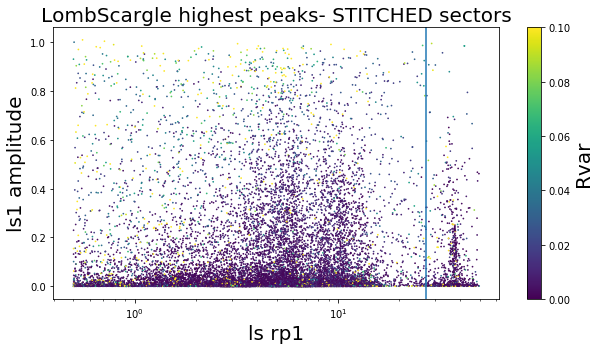

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(allstats['ls1'],allstats['lsamp1'],s=.5,c=allstats['rvar'],vmax=0.1,vmin=0.0);
plt.xlabel('ls rp1',fontsize=20);
plt.ylabel('ls1 amplitude',fontsize=20);
plt.axvline(27) #cadence
plt.xscale('log')
plt.colorbar().set_label(label='Rvar',size=20)
#plt.xlim(0.35,1.05)
#plt.xlim(4,11)
plt.title('LombScargle highest peaks- STITCHED sectors',fontsize=20);
print('max rvar:',np.max(allstats['rvar']),'min rvar:',np.min(allstats['rvar']),'mean rvar:',np.mean(allstats['rvar']))
print('this is weird b/c how can it measure longer than its seen?');

max rvar: 215.70187377929688 min rvar: 0.0002478957176208496 0.055391362110835965
this is weird b/c how can it measure longer than its seen?


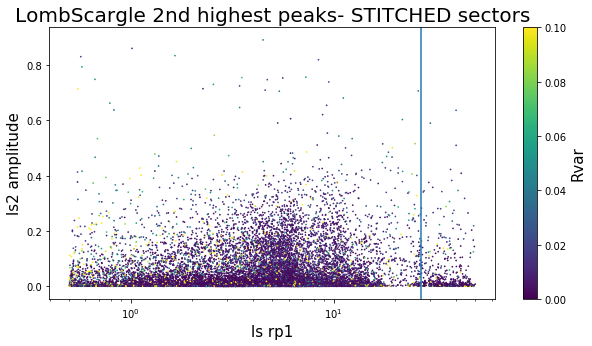

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(allstats['ls2'],allstats['lsamp2'],s=.5,c=allstats['rvar'],vmax=0.1,vmin=0.0);
plt.xlabel('ls rp1',fontsize=15);
plt.ylabel('ls2 amplitude',fontsize=15);
plt.axvline(27) #cadence
plt.xscale('log')
plt.colorbar().set_label(label='Rvar',size=15)
plt.title('LombScargle 2nd highest peaks- STITCHED sectors',fontsize=20);

print('max rvar:',np.max(allstats['rvar']),'min rvar:',np.min(allstats['rvar']),np.mean(allstats['rvar']))
print('this is weird b/c how can it measure longer than its seen?');

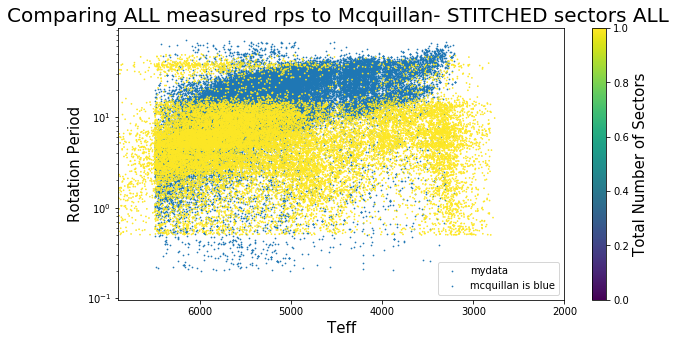

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(allstats['Teff'],allstats['ls1'],s=.5,c=allstats['TOTsecs'],vmax=0.1,vmin=0.0,label='mydata');
plt.scatter(mq['TEMP'],mq['ROTATION_PERIOD'],s=.5,vmax=0.1,vmin=0.0,zorder=0,label='mcquillan is blue');

plt.xlabel('Teff',fontsize=15);
plt.ylabel('Rotation Period',fontsize=15);
# plt.axvline(27) #cadence
plt.yscale('log')
plt.xlim(6900,2000)
plt.colorbar().set_label(label='Total Number of Sectors',size=15)
plt.legend()
plt.title('Comparing ALL measured rps to Mcquillan- STITCHED sectors ALL ',fontsize=20);

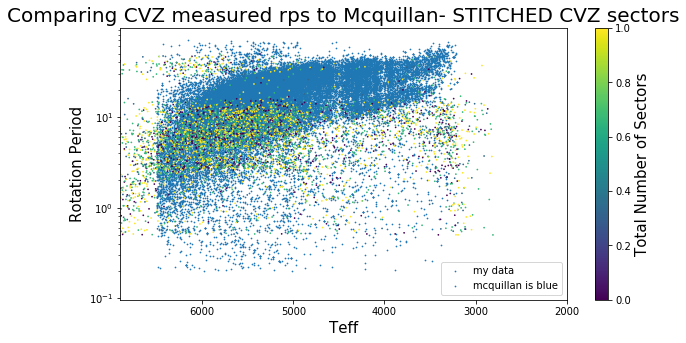

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(cvzstats['Teff'],cvzstats['ls1'],s=.5,c=cvzstats['TOTsecs'],vmax=13,vmin=10,label='my data');
plt.scatter(mq['TEMP'],mq['ROTATION_PERIOD'],s=.5,vmax=13,vmin=10,zorder=0,label='mcquillan is blue');


plt.xlabel('Teff',fontsize=15);
plt.ylabel('Rotation Period',fontsize=15);
# plt.axvline(27) #cadence
plt.yscale('log')
plt.xlim(6900,2000)
plt.legend()
plt.colorbar().set_label(label='Total Number of Sectors',size=15)
plt.title('Comparing CVZ measured rps to Mcquillan- STITCHED CVZ sectors',fontsize=20);




(0, 52)

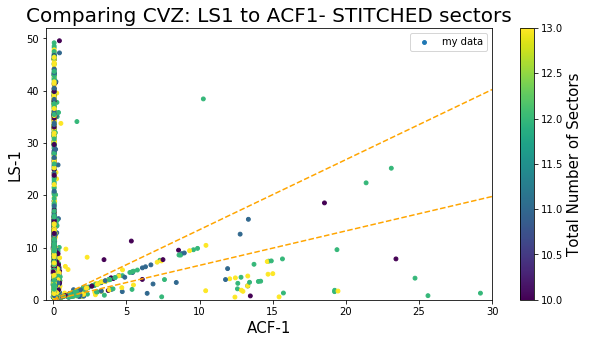

In [10]:
#isolating matches

#isolating region within 1sig of agreement
xy = np.arange(0,150,1)

plt.figure(figsize=(10,5))

plt.scatter(cvzstats['acf1'],cvzstats['ls1'],s=15,c=cvzstats['TOTsecs'],vmax=13,vmin=10,label='my data');
plt.plot(xy+(.341*xy),linestyle='--',color='orange')
plt.plot(xy-(.341*xy),linestyle='--',color='orange')

plt.xlabel('ACF-1',fontsize=15);
plt.ylabel('LS-1',fontsize=15);
plt.legend()
plt.colorbar().set_label(label='Total Number of Sectors',size=15)
plt.title('Comparing CVZ: LS1 to ACF1- STITCHED sectors',fontsize=20);
plt.xlim(-.5,30)
plt.ylim(0,52) #to easily compare to above

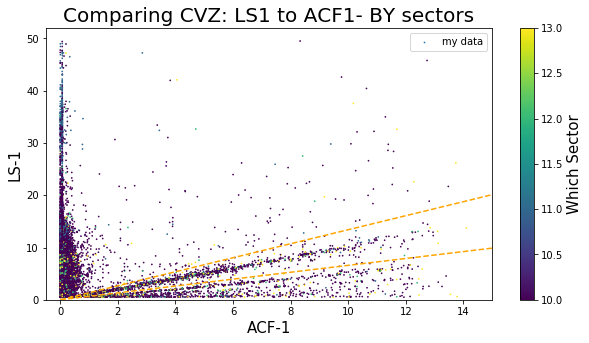

In [11]:
#isolating matches

#isolating region within 1sig of agreement
xy = np.arange(0,150,1)

plt.figure(figsize=(10,5))

plt.scatter(cvzsecs['acf1'],cvzsecs['ls1'],s=.5,c=cvzsecs['sector'],vmax=13,vmin=10,label='my data');
plt.plot(xy+(.341*xy),linestyle='--',color='orange')
plt.plot(xy-(.341*xy),linestyle='--',color='orange')

plt.xlabel('ACF-1',fontsize=15);
plt.ylabel('LS-1',fontsize=15);
plt.legend()
plt.colorbar().set_label(label='Which Sector',size=15)
plt.title('Comparing CVZ: LS1 to ACF1- BY sectors',fontsize=20);
plt.xlim(-.5,15)
plt.ylim(0,52); #to easily compare to above

Text(0, 0.5, 'number')

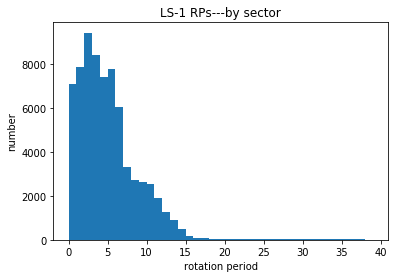

In [12]:
plt.hist(cvzsecs['ls1'],bins=np.arange(0,40,1))
plt.title('LS-1 RPs---by sector')
plt.xlabel('rotation period')
plt.ylabel('number')

Text(0, 0.5, 'number')

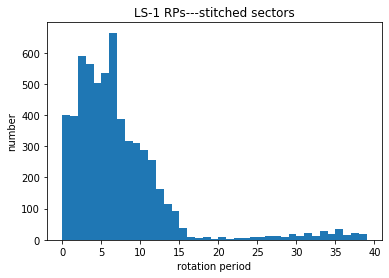

In [13]:
plt.hist(cvzstats['ls1'],bins=np.arange(0,40,1))
plt.title('LS-1 RPs---stitched sectors')
plt.xlabel('rotation period')
plt.ylabel('number')

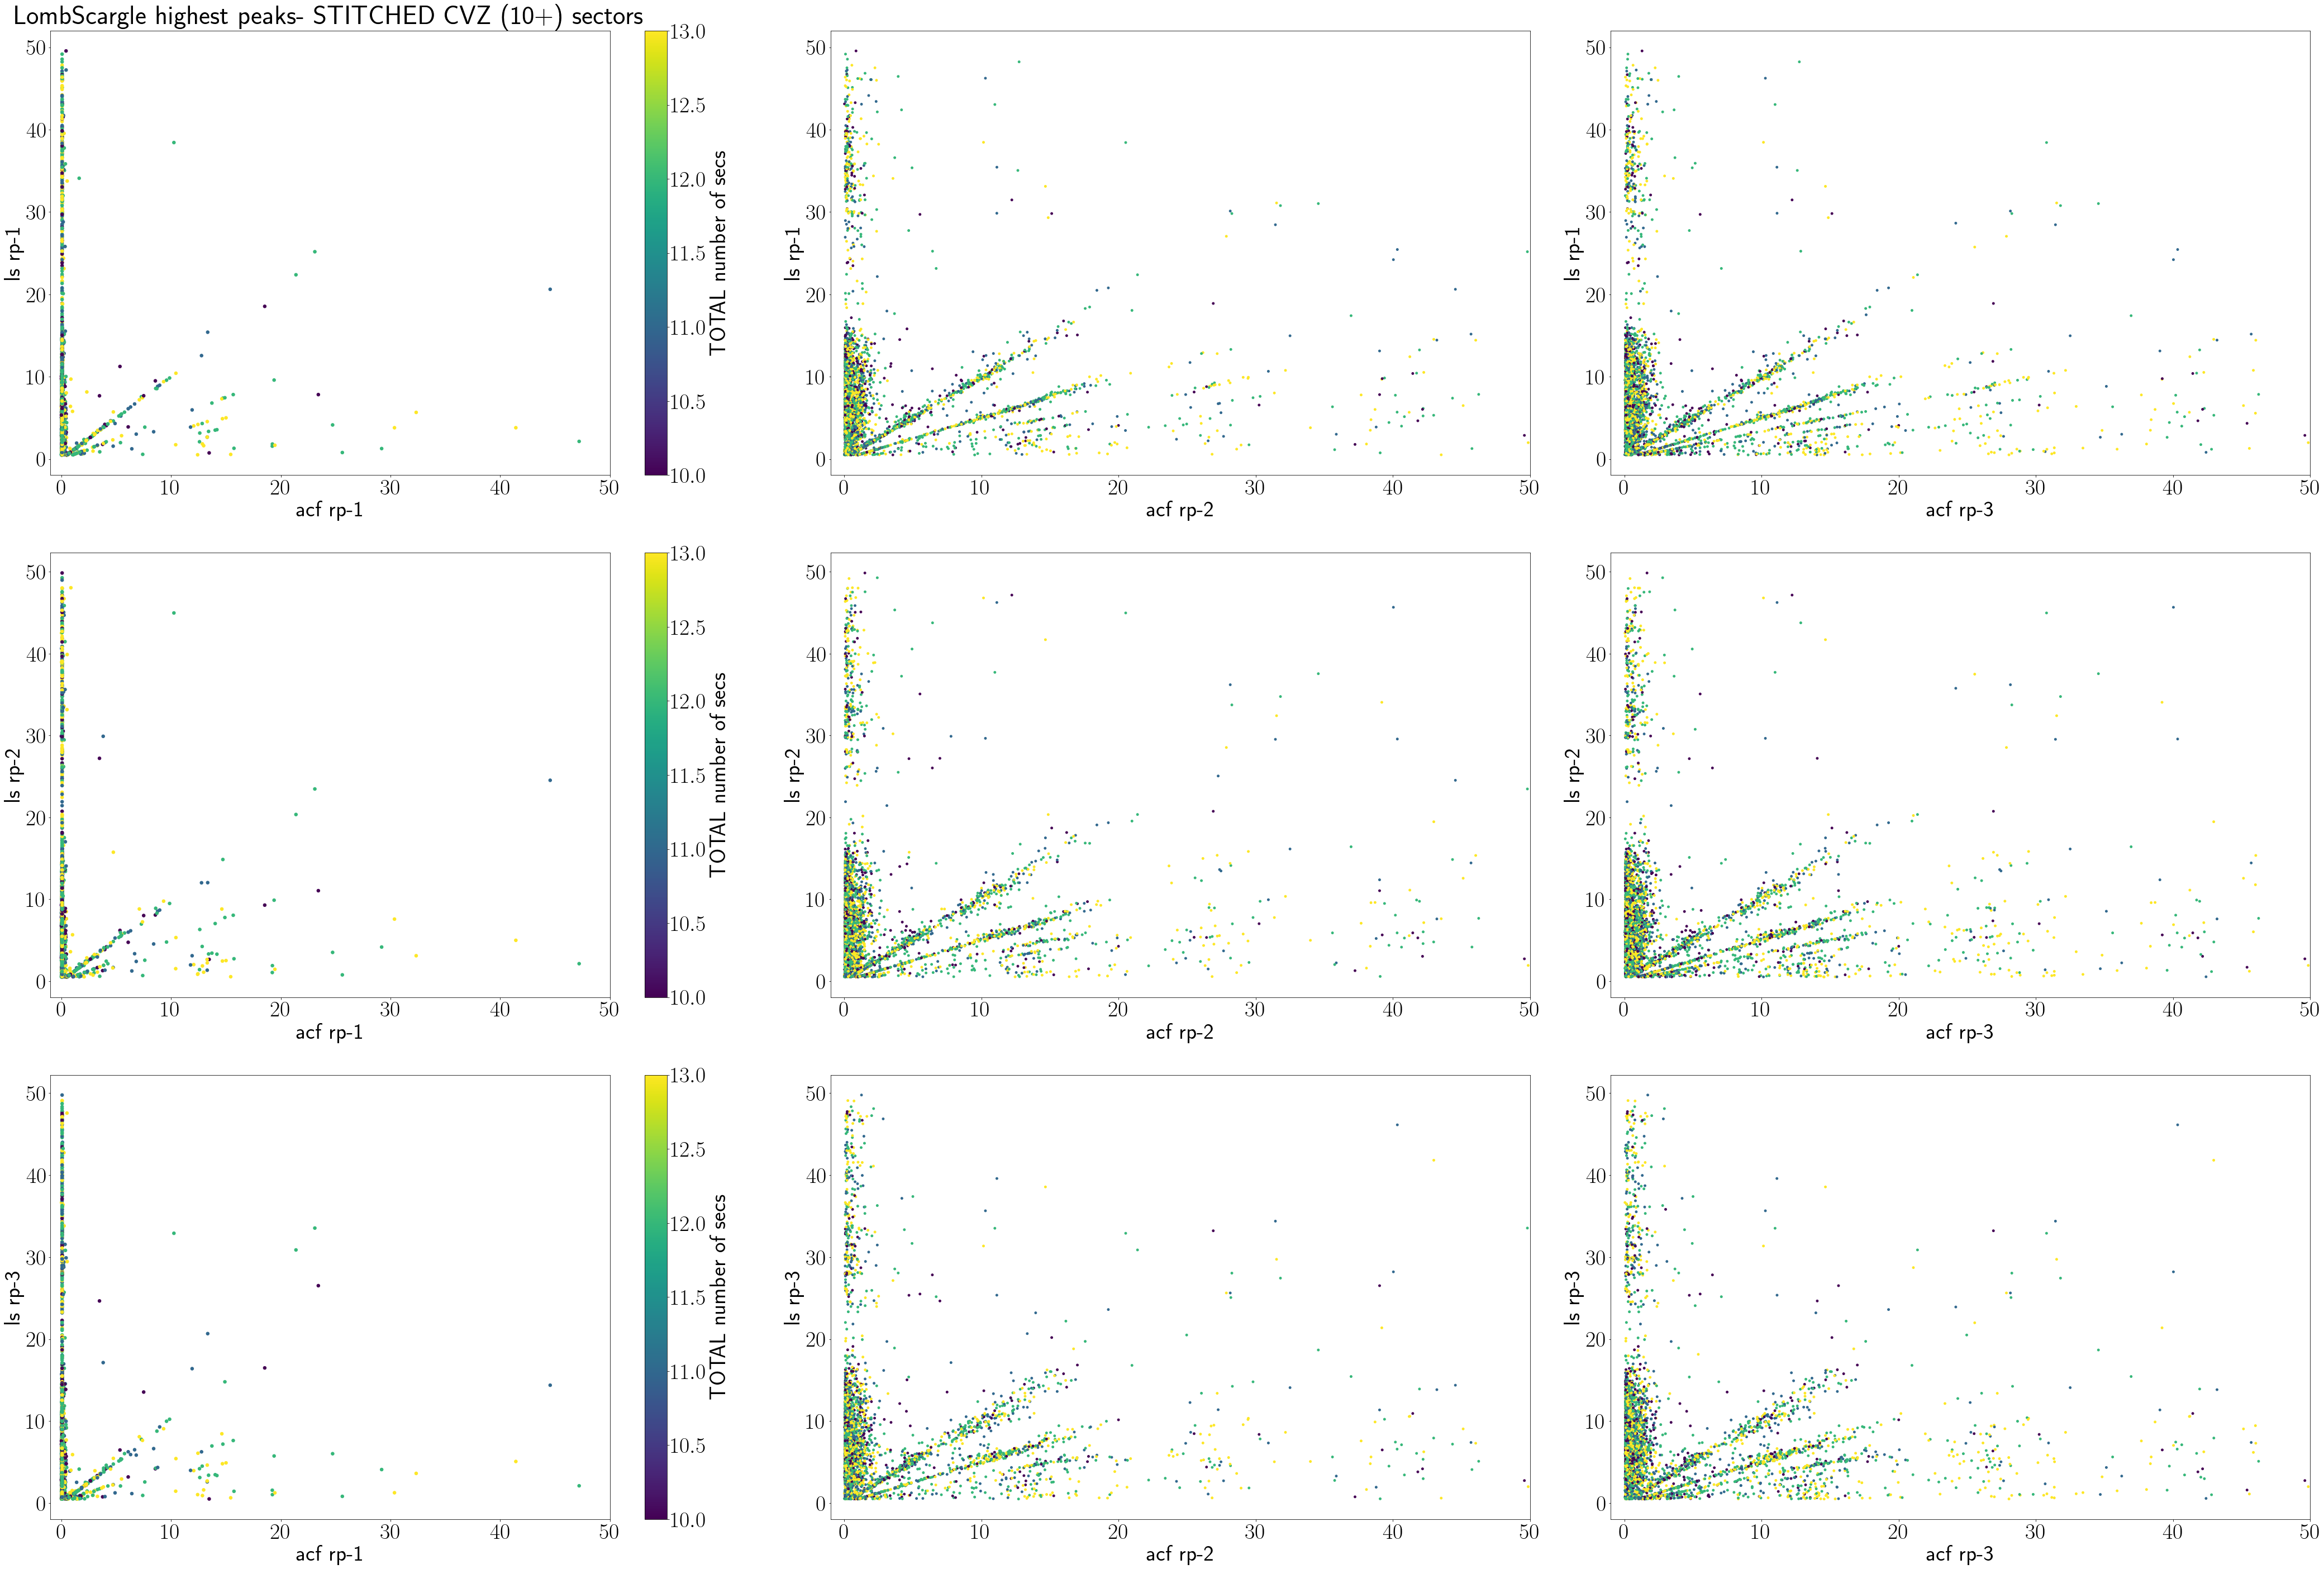

In [24]:
# plt.figure(figsize=(20,30))
fig,axs = plt.subplots(3,3,figsize=(60,40))
plt.rcParams.update({'font.size': 40})
SMALL_SIZE = 20
MEDIUM_SIZE = 40
BIGGER_SIZE = 60

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#one
axs[0, 0].set_title("LombScargle highest peaks- STITCHED CVZ (10+) sectors")
im=axs[0, 0].scatter(cvzstats['acf1'],cvzstats['ls1'],s=30,c=cvzstats['TOTsecs'],vmax=13,vmin=10)#plot(t, s, color='C0')
axs[0, 0].set_xlabel("acf rp-1")
axs[0, 0].set_ylabel("ls rp-1");
fig.colorbar(im, ax=axs[0,0],label="TOTAL number of secs");
axs[0,0].set_xlim(-1,50)
#two
# axs[0, 1].set_title("LombScargle highest peaks- STITCHED sectors")
im=axs[0, 1].scatter(cvzstats['acf2'],cvzstats['ls1'],s=15,c=cvzstats['TOTsecs'],vmax=13,vmin=10)#plot(t, s, color='C0')
axs[0, 1].set_xlabel("acf rp-2")
axs[0, 1].set_ylabel("ls rp-1");
# fig.colorbar(im, ax=axs[0,1],label="Rvar");
axs[0,1].set_xlim(-1,50)
#three
# axs[0, 2].set_title("LombScargle highest peaks- STITCHED sectors")
im=axs[0, 2].scatter(cvzstats['acf3'],cvzstats['ls1'],s=15,c=cvzstats['TOTsecs'],vmax=13,vmin=10)#plot(t, s, color='C0')
axs[0, 2].set_xlabel("acf rp-3")
axs[0, 2].set_ylabel("ls rp-1");
# fig.colorbar(im, ax=axs[0,2],label="Rvar");
axs[0,2].set_xlim(-1,50)
#four
# axs[1, 0].set_title("LombScargle 2nd highest peaks- STITCHED sectors")
im=axs[1, 0].scatter(cvzstats['acf1'],cvzstats['ls2'],s=30,c=cvzstats['TOTsecs'],vmax=13,vmin=10)#plot(t, s, color='C0')
axs[1, 0].set_xlabel("acf rp-1")
axs[1, 0].set_ylabel("ls rp-2");
fig.colorbar(im, ax=axs[1,0],label="TOTAL number of secs");
axs[1,0].set_xlim(-1,50)
#five
# axs[1, 1].set_title("LombScargle 2nd highest peaks- STITCHED sectors")
im=axs[1, 1].scatter(cvzstats['acf2'],cvzstats['ls2'],s=15,c=cvzstats['TOTsecs'],vmax=13,vmin=10)#plot(t, s, color='C0')
axs[1, 1].set_xlabel("acf rp-2")
axs[1, 1].set_ylabel("ls rp-2");
# fig.colorbar(im, ax=axs[1,1],label="Rvar");
axs[1,1].set_xlim(-1,50)
#six
# axs[1, 2].set_title("LombScargle 2nd highest peaks- STITCHED sectors")
im=axs[1, 2].scatter(cvzstats['acf3'],cvzstats['ls2'],s=15,c=cvzstats['TOTsecs'],vmax=13,vmin=10)#plot(t, s, color='C0')
axs[1, 2].set_xlabel("acf rp-3")
axs[1, 2].set_ylabel("ls rp-2");
# fig.colorbar(im, ax=axs[1,2],label="Rvar");
axs[1,2].set_xlim(-1,50)
#seven
# axs[2, 0].set_title("LombScargle 3rd highest peaks- STITCHED sectors")
im=axs[2, 0].scatter(cvzstats['acf1'],cvzstats['ls3'],s=30,c=cvzstats['TOTsecs'],vmax=13,vmin=10)#plot(t, s, color='C0')
axs[2, 0].set_xlabel("acf rp-1")
axs[2, 0].set_ylabel("ls rp-3");
fig.colorbar(im, ax=axs[2,0],label="TOTAL number of secs");
axs[2,0].set_xlim(-1,50)
#eight
# axs[2, 1].set_title("LombScargle 3rd highest peaks- STITCHED sectors")
im=axs[2, 1].scatter(cvzstats['acf2'],cvzstats['ls3'],s=15,c=cvzstats['TOTsecs'],vmax=13,vmin=10)#plot(t, s, color='C0')
axs[2, 1].set_xlabel("acf rp-2")
axs[2, 1].set_ylabel("ls rp-3");
# fig.colorbar(im, ax=axs[2,1],label="Rvar");
axs[2,1].set_xlim(-1,50)
#nine
# axs[2, 2].set_title("LombScargle 3rd highest peaks- STITCHED sectors")
im=axs[2, 2].scatter(cvzstats['acf3'],cvzstats['ls3'],s=15,c=cvzstats['TOTsecs'],vmax=13,vmin=10)#plot(t, s, color='C0')
axs[2, 2].set_xlabel("acf rp-3")
axs[2, 2].set_ylabel("ls rp-3");
# fig.colorbar(im, ax=axs[2,2],label="Rvar");
axs[2,2].set_xlim(-1,50);
plt.tight_layout()
# axs[::].set_xscale('log')
# plt.rcParams.update({'font.size': 20})

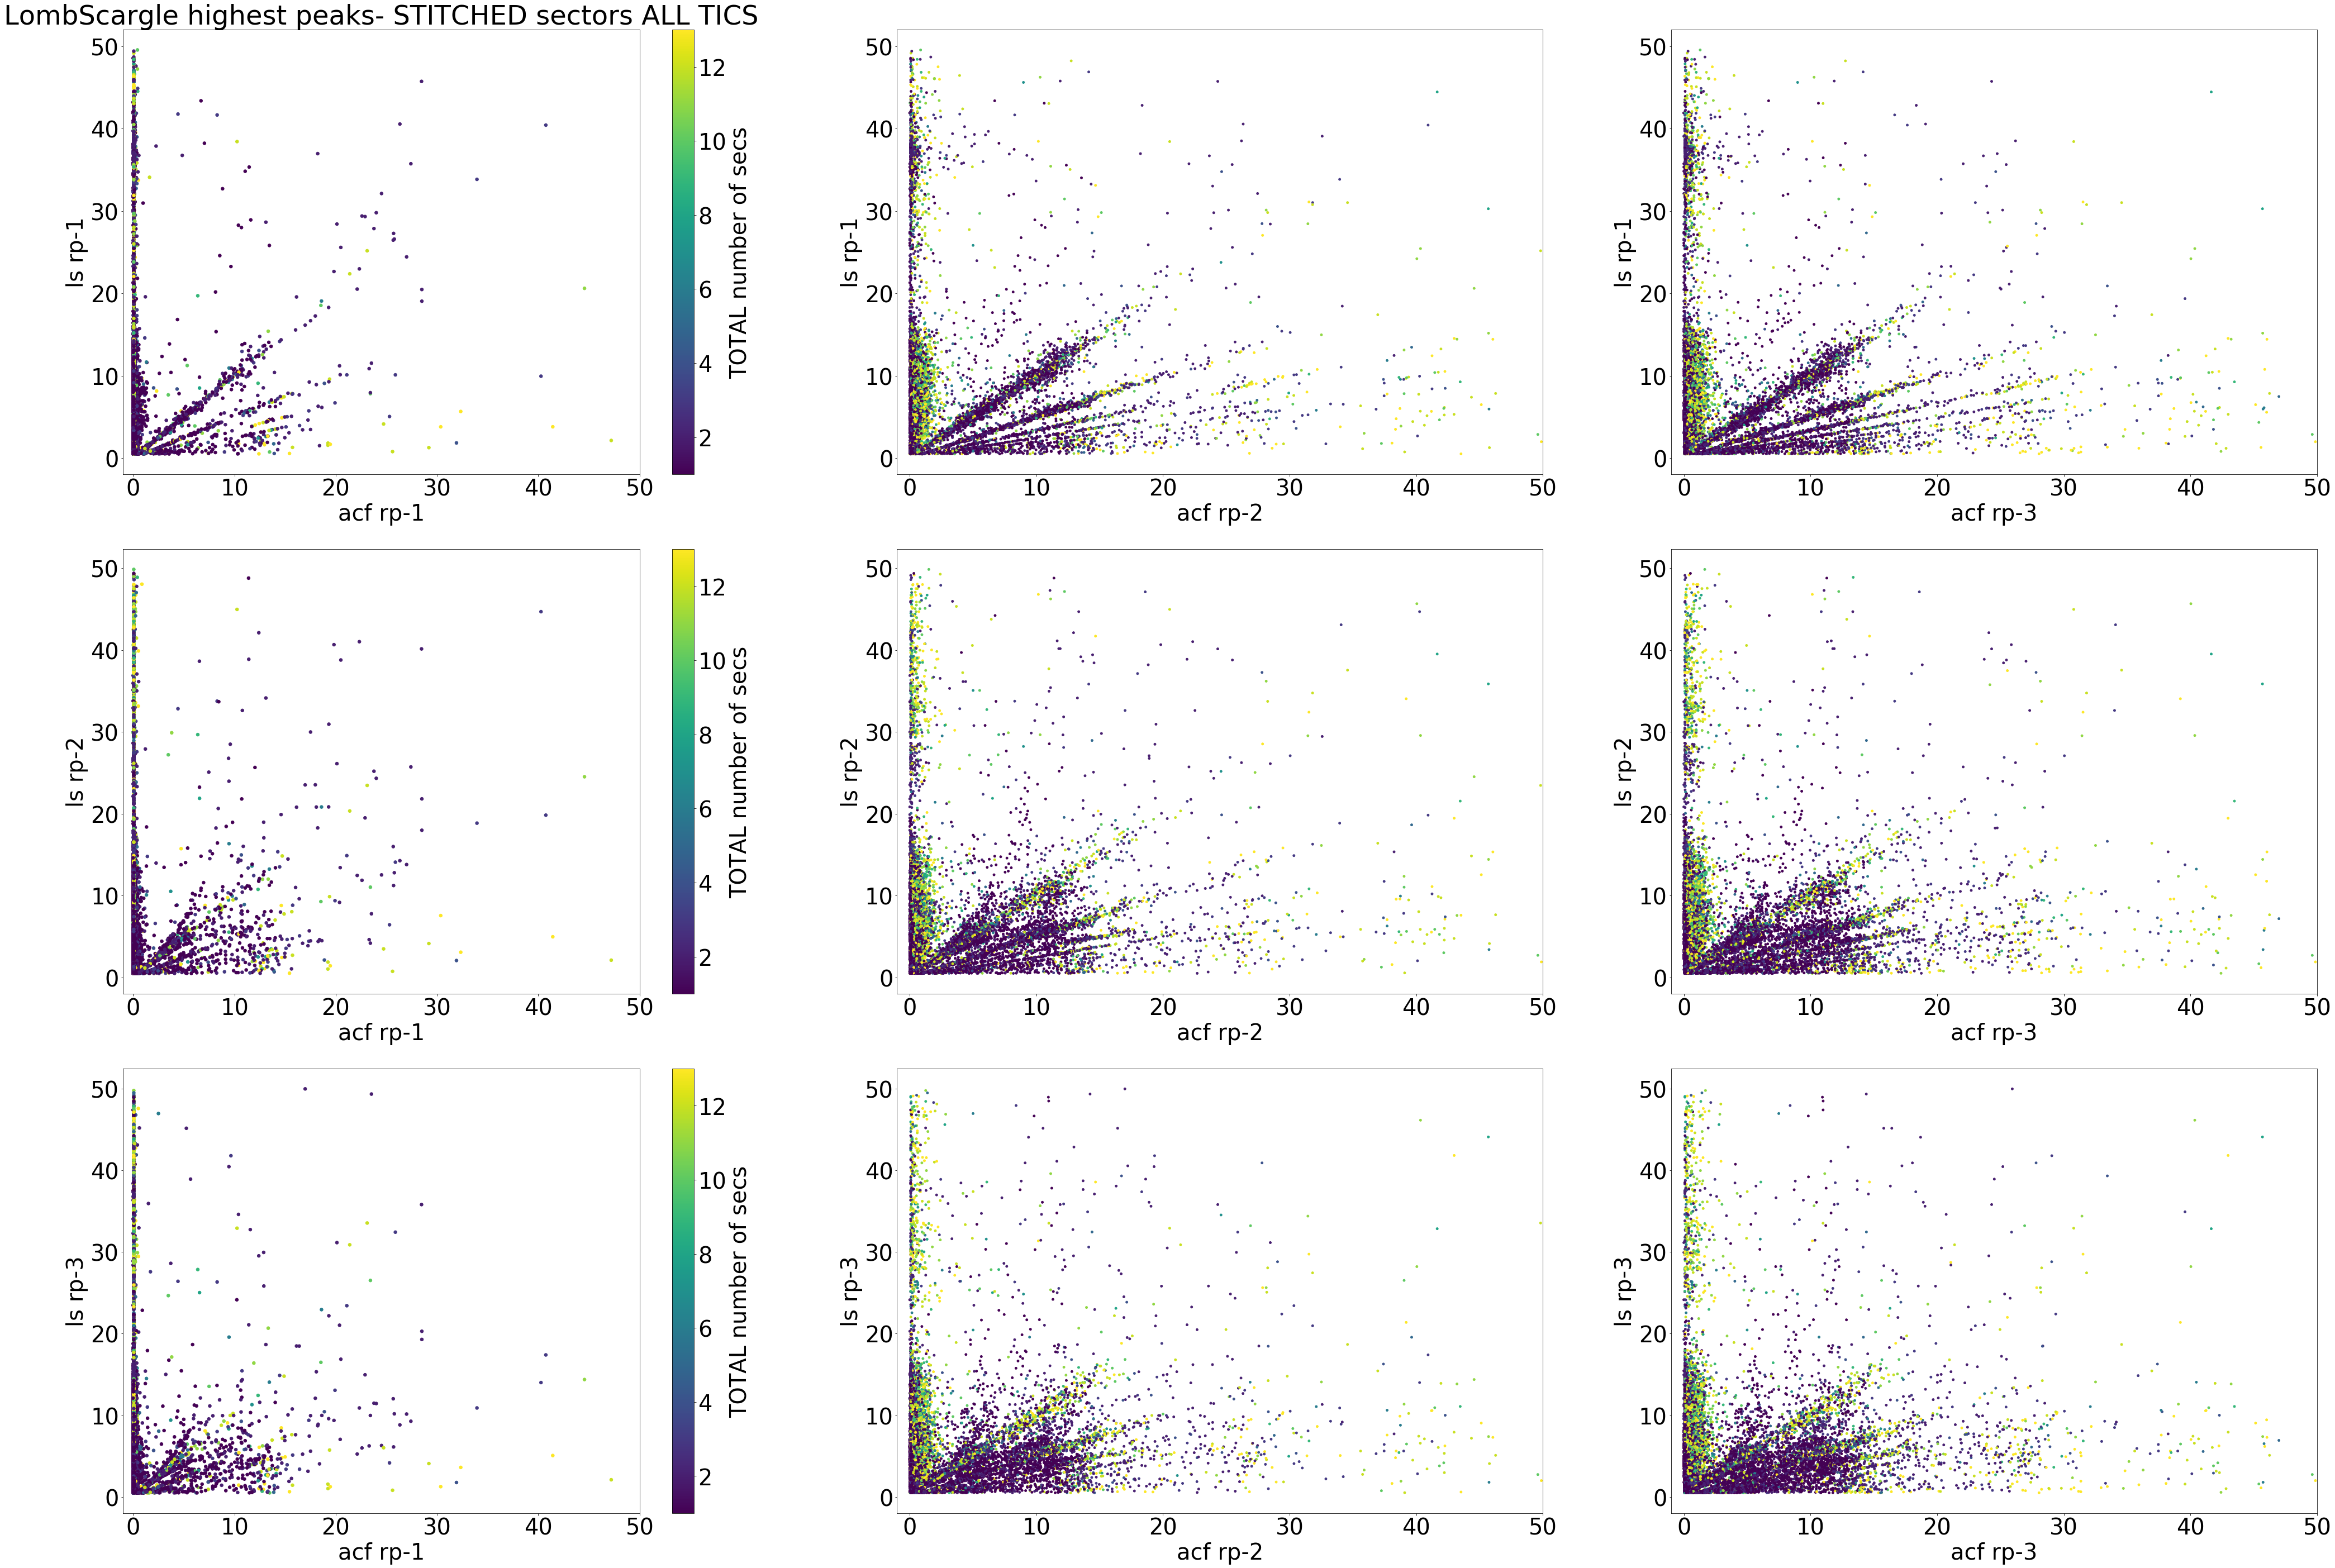

In [15]:
# plt.figure(figsize=(20,30))
fig,axs = plt.subplots(3,3,figsize=(60,40))
plt.rcParams.update({'font.size': 40})
SMALL_SIZE = 20
MEDIUM_SIZE = 40
BIGGER_SIZE = 60

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


#one
axs[0, 0].set_title("LombScargle highest peaks- STITCHED sectors ALL TICS")
im=axs[0, 0].scatter(allstats['acf1'],allstats['ls1'],s=30,c=allstats['TOTsecs'],vmax=13,vmin=1)#plot(t, s, color='C0')
axs[0, 0].set_xlabel("acf rp-1")
axs[0, 0].set_ylabel("ls rp-1");
fig.colorbar(im, ax=axs[0,0],label="TOTAL number of secs");
axs[0,0].set_xlim(-1,50)
#two
# axs[0, 1].set_title("LombScargle highest peaks- STITCHED sectors")
im=axs[0, 1].scatter(allstats['acf2'],allstats['ls1'],s=15,c=allstats['TOTsecs'],vmax=13,vmin=1)#plot(t, s, color='C0')
axs[0, 1].set_xlabel("acf rp-2")
axs[0, 1].set_ylabel("ls rp-1");
# fig.colorbar(im, ax=axs[0,1],label="Rvar");
axs[0,1].set_xlim(-1,50)
#three
# axs[0, 2].set_title("LombScargle highest peaks- STITCHED sectors")
im=axs[0, 2].scatter(allstats['acf3'],allstats['ls1'],s=15,c=allstats['TOTsecs'],vmax=13,vmin=1)#plot(t, s, color='C0')
axs[0, 2].set_xlabel("acf rp-3")
axs[0, 2].set_ylabel("ls rp-1");
# fig.colorbar(im, ax=axs[0,2],label="Rvar");
axs[0,2].set_xlim(-1,50)
#four
# axs[1, 0].set_title("LombScargle 2nd highest peaks- STITCHED sectors")
im=axs[1, 0].scatter(allstats['acf1'],allstats['ls2'],s=30,c=allstats['TOTsecs'],vmax=13,vmin=1)#plot(t, s, color='C0')
axs[1, 0].set_xlabel("acf rp-1")
axs[1, 0].set_ylabel("ls rp-2");
fig.colorbar(im, ax=axs[1,0],label="TOTAL number of secs");
axs[1,0].set_xlim(-1,50)
#five
# axs[1, 1].set_title("LombScargle 2nd highest peaks- STITCHED sectors")
im=axs[1, 1].scatter(allstats['acf2'],allstats['ls2'],s=15,c=allstats['TOTsecs'],vmax=13,vmin=1)#plot(t, s, color='C0')
axs[1, 1].set_xlabel("acf rp-2")
axs[1, 1].set_ylabel("ls rp-2");
# fig.colorbar(im, ax=axs[1,1],label="Rvar");
axs[1,1].set_xlim(-1,50)
#six
# axs[1, 2].set_title("LombScargle 2nd highest peaks- STITCHED sectors")
im=axs[1, 2].scatter(allstats['acf3'],allstats['ls2'],s=15,c=allstats['TOTsecs'],vmax=13,vmin=1)#plot(t, s, color='C0')
axs[1, 2].set_xlabel("acf rp-3")
axs[1, 2].set_ylabel("ls rp-2");
# fig.colorbar(im, ax=axs[1,2],label="Rvar");
axs[1,2].set_xlim(-1,50)
#seven
# axs[2, 0].set_title("LombScargle 3rd highest peaks- STITCHED sectors")
im=axs[2, 0].scatter(allstats['acf1'],allstats['ls3'],s=30,c=allstats['TOTsecs'],vmax=13,vmin=1)#plot(t, s, color='C0')
axs[2, 0].set_xlabel("acf rp-1")
axs[2, 0].set_ylabel("ls rp-3");
fig.colorbar(im, ax=axs[2,0],label="TOTAL number of secs");
axs[2,0].set_xlim(-1,50)
#eight
# axs[2, 1].set_title("LombScargle 3rd highest peaks- STITCHED sectors")
im=axs[2, 1].scatter(allstats['acf2'],allstats['ls3'],s=15,c=allstats['TOTsecs'],vmax=13,vmin=1)#plot(t, s, color='C0')
axs[2, 1].set_xlabel("acf rp-2")
axs[2, 1].set_ylabel("ls rp-3");
# fig.colorbar(im, ax=axs[2,1],label="Rvar");
axs[2,1].set_xlim(-1,50)
#nine
# axs[2, 2].set_title("LombScargle 3rd highest peaks- STITCHED sectors")
im=axs[2, 2].scatter(allstats['acf3'],allstats['ls3'],s=15,c=allstats['TOTsecs'],vmax=13,vmin=1)#plot(t, s, color='C0')
axs[2, 2].set_xlabel("acf rp-3")
axs[2, 2].set_ylabel("ls rp-3");
# fig.colorbar(im, ax=axs[2,2],label="Rvar");
axs[2,2].set_xlim(-1,50);
plt.tight_layout()
# axs[::].set_xscale('log')
# plt.rcParams.update({'font.size': 20})

(0, 52)

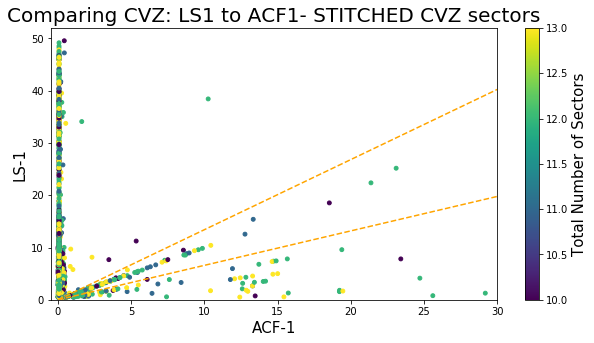

In [16]:
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels


#isolating matches

#isolating region within 1sig of agreement
xy = np.arange(0,150,1)

plt.figure(figsize=(10,5))

plt.scatter(cvzstats['acf1'],cvzstats['ls1'],s=15,c=cvzstats['TOTsecs'],vmax=13,vmin=10);
plt.plot(xy+(.341*xy),linestyle='--',color='orange')
plt.plot(xy-(.341*xy),linestyle='--',color='orange')

plt.xlabel('ACF-1',fontsize=15);
plt.ylabel('LS-1',fontsize=15);
# plt.legend()
plt.colorbar().set_label(label='Total Number of Sectors',size=15)
plt.title('Comparing CVZ: LS1 to ACF1- STITCHED CVZ sectors',fontsize=20);
plt.xlim(-.5,30)
plt.ylim(0,52) #

In [17]:
CVZstatsagree = cvzstats[(cvzstats['acf1'] / cvzstats['ls1'] <= 1.341) & (cvzstats['acf1'] / cvzstats['ls1'] >= 0.659)]
len(CVZstatsagree)

218

why is the scale on colorbar weird?


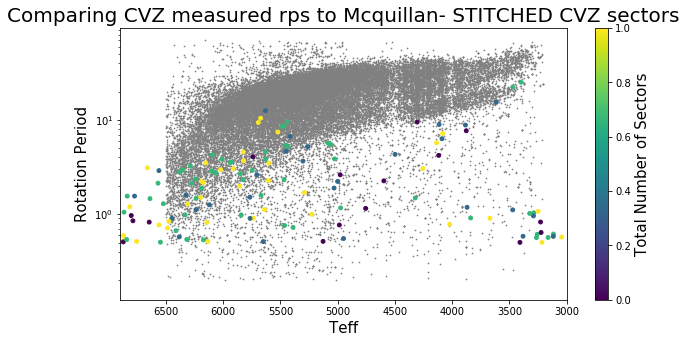

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(CVZstatsagree['Teff'],CVZstatsagree['ls1'],s=15,c=CVZstatsagree['TOTsecs'],vmax=13,vmin=10);
plt.scatter(mq['TEMP'],mq['ROTATION_PERIOD'],s=.5,vmax=13,vmin=1,zorder=0,color = 'grey')#label='mcquillan is blue');


plt.xlabel('Teff',fontsize=15);
plt.ylabel('Rotation Period',fontsize=15);
# plt.axvline(27) #cadence
plt.yscale('log')
plt.xlim(6900,3000)
# plt.legend()
plt.colorbar().set_label(label='Total Number of Sectors',size=15)
plt.title('Comparing CVZ measured rps to Mcquillan- STITCHED CVZ sectors',fontsize=20);



print('why is the scale on colorbar weird?')

(0, 52)

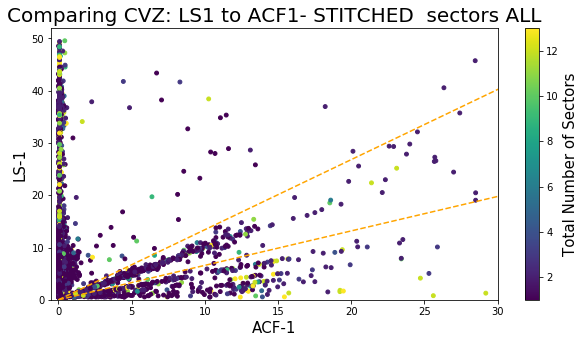

In [19]:
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)    # fontsize of the tick labels


#isolating matches

#isolating region within 1sig of agreement
xy = np.arange(0,150,1)

plt.figure(figsize=(10,5))

plt.scatter(allstats['acf1'],allstats['ls1'],s=15,c=allstats['TOTsecs'],vmax=13,vmin=1);
plt.plot(xy+(.341*xy),linestyle='--',color='orange')
plt.plot(xy-(.341*xy),linestyle='--',color='orange')

plt.xlabel('ACF-1',fontsize=15);
plt.ylabel('LS-1',fontsize=15);
# plt.legend()
plt.colorbar().set_label(label='Total Number of Sectors',size=15)
plt.title('Comparing CVZ: LS1 to ACF1- STITCHED  sectors ALL',fontsize=20);
plt.xlim(-.5,30)
plt.ylim(0,52) #

In [20]:
ALLstatsagree = allstats[(allstats['acf1'] / allstats['ls1'] <= 1.341) & (allstats['acf1'] / allstats['ls1'] >= 0.659)]
len(ALLstatsagree)

1066

why is the scale on colorbar weird?


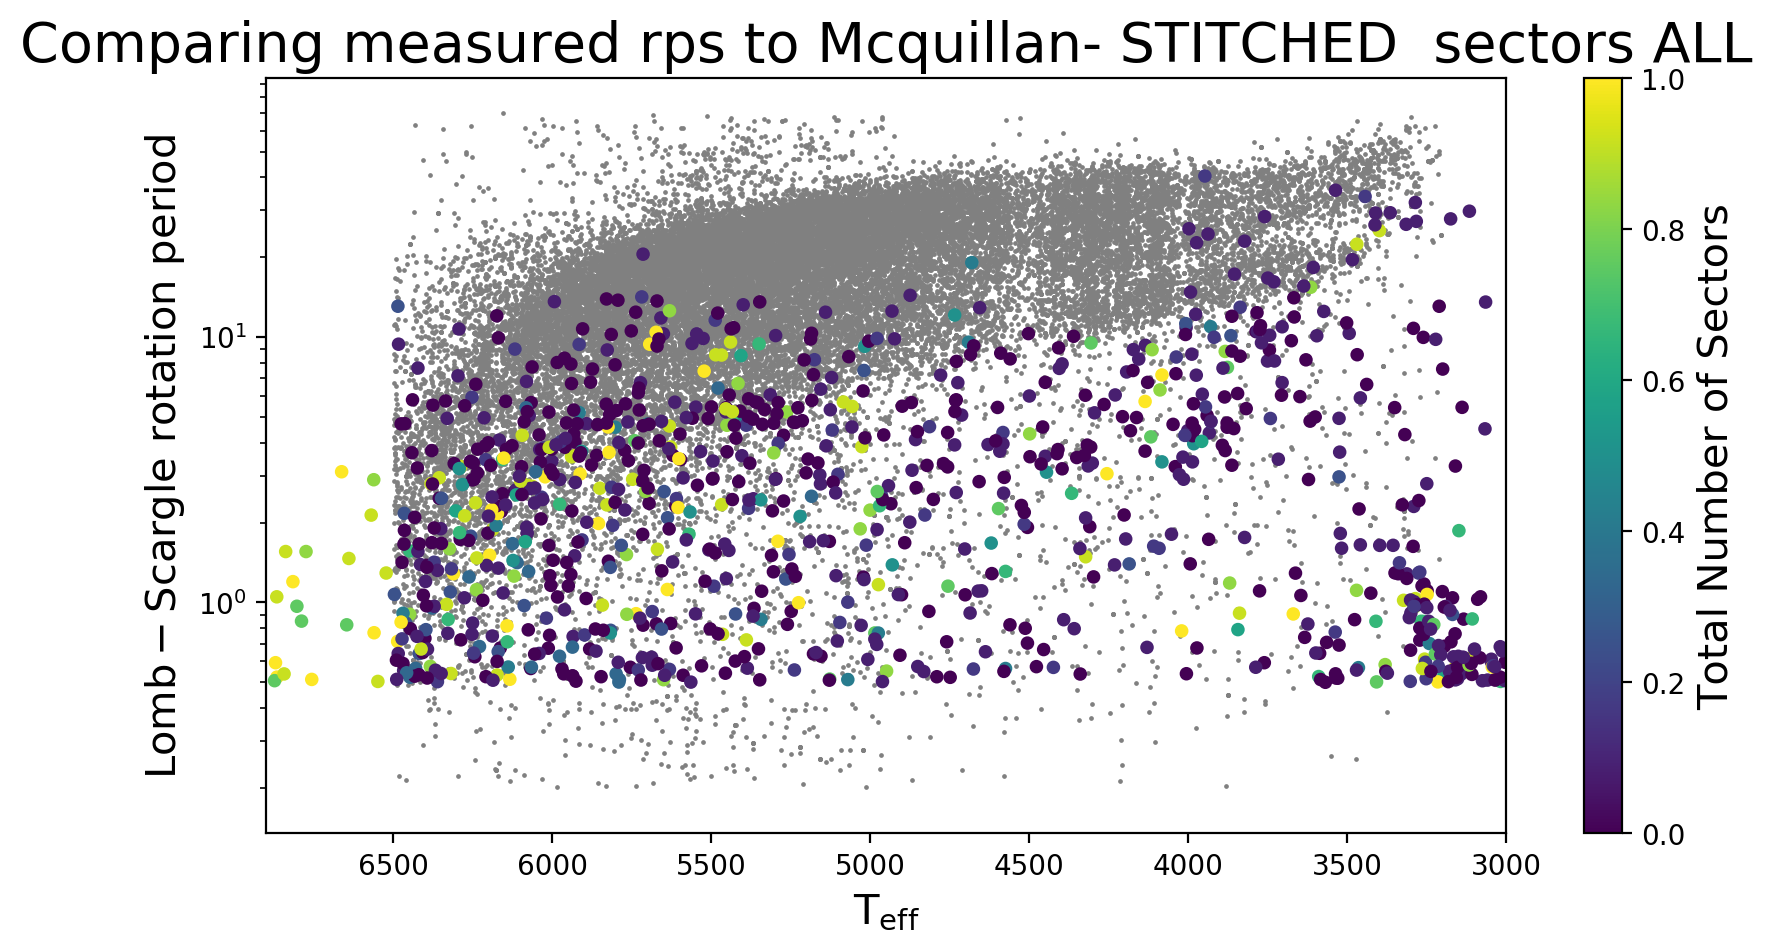

In [21]:

plt.figure(figsize=(10,5),dpi=200)
plt.scatter(ALLstatsagree['Teff'],ALLstatsagree['ls1'],s=15,c=ALLstatsagree['TOTsecs'],vmax=13,vmin=1, rasterized=True);
plt.scatter(mq['TEMP'],mq['ROTATION_PERIOD'],s=.5,vmax=13,vmin=1,zorder=0,color = 'grey', rasterized=True)#label='mcquillan is blue');


plt.xlabel('$\mathrm{T_{eff}}$',fontsize=15);
plt.ylabel("$\mathrm{Lomb-Scargle~rotation~period}$",fontsize=15);
# plt.axvline(27) #cadence
plt.yscale('log')
plt.xlim(6900,3000)
# plt.legend()
plt.colorbar().set_label(label='Total Number of Sectors',size=15)
plt.title('Comparing measured rps to Mcquillan- STITCHED  sectors ALL',fontsize=20);



print('why is the scale on colorbar weird?')

why is the scale on colorbar weird?


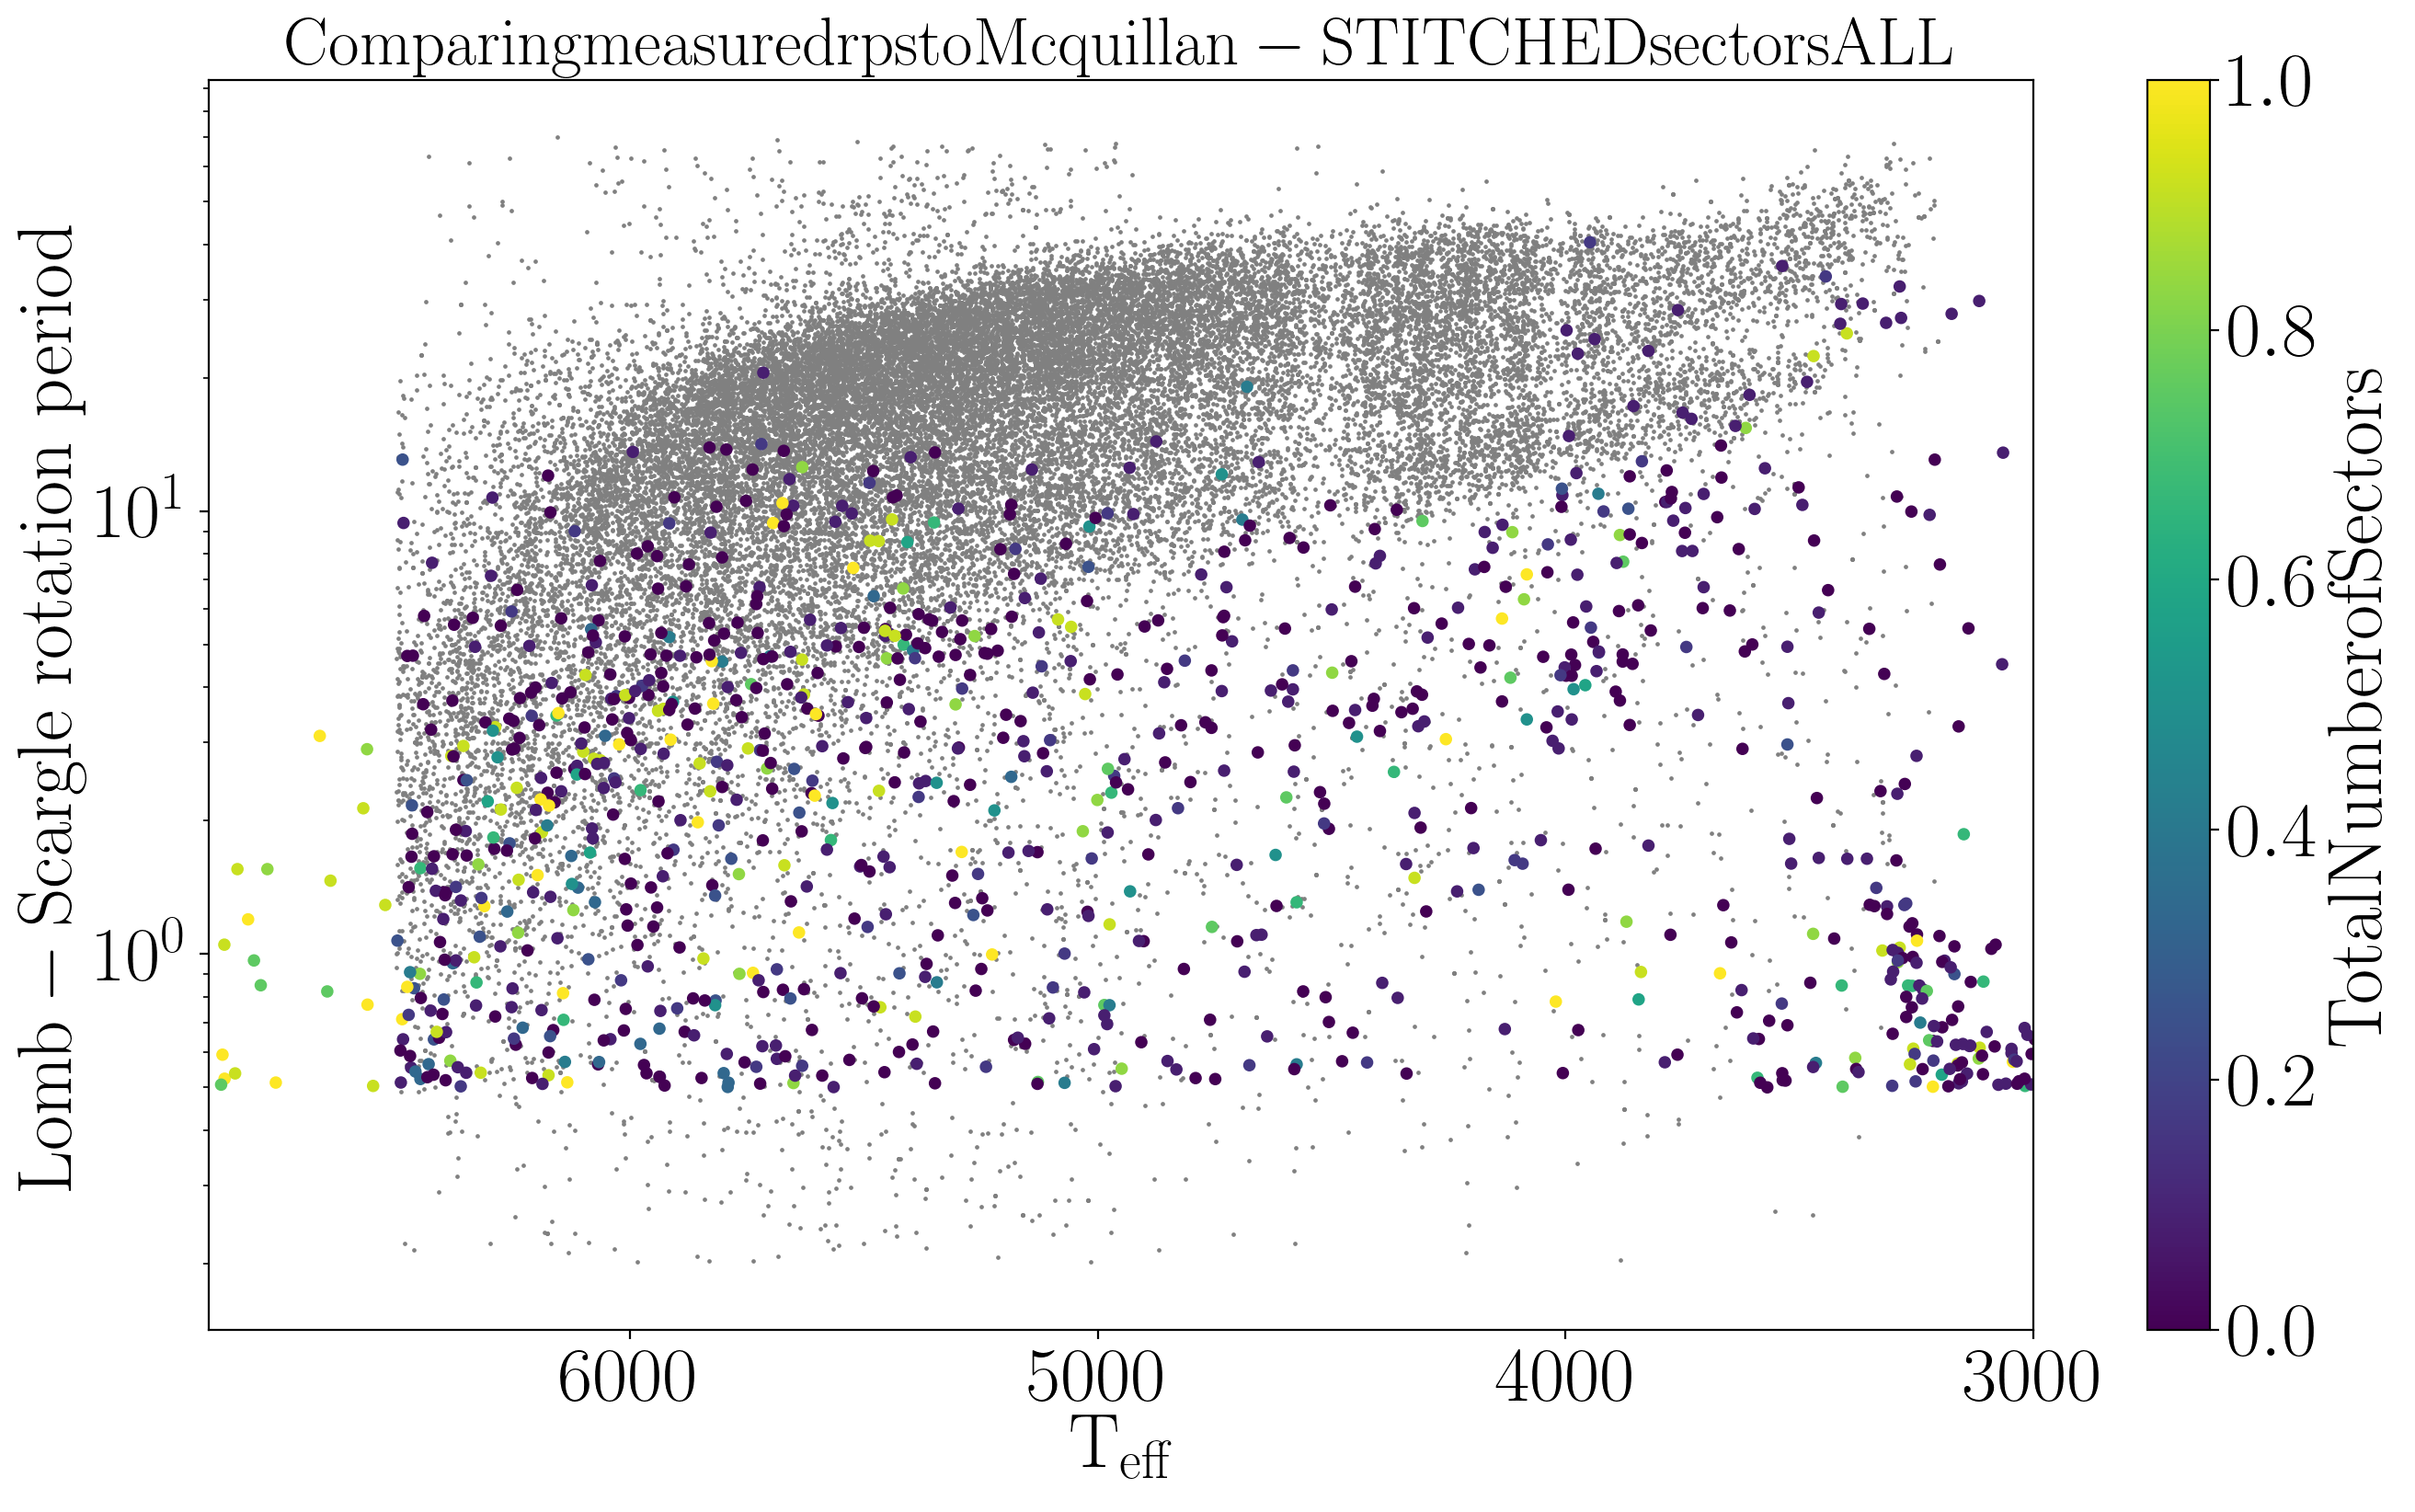

In [22]:
plotpar = {'axes.labelsize': 30,
     'font.size': 22,
     'legend.fontsize': 15,
     'xtick.labelsize': 30,
     'ytick.labelsize': 30,
     'text.usetex': True}
plt.rcParams.update(plotpar)

plt.figure(figsize=(16,9),dpi=200)
plt.scatter(ALLstatsagree['Teff'],ALLstatsagree['ls1'],s=15,c=ALLstatsagree['TOTsecs'],vmax=13,vmin=1, rasterized=True);
plt.scatter(mq['TEMP'],mq['ROTATION_PERIOD'],s=.5,vmax=13,vmin=1,zorder=0,color = 'grey', rasterized=True)#;


plt.xlabel('$\mathrm{T_{eff}}$');
plt.ylabel("$\mathrm{Lomb-Scargle~rotation~period}$");
# plt.axvline(27) #cadence
plt.yscale('log')
plt.xlim(6900,3000)
# plt.legend()
plt.colorbar().set_label(label='$\mathrm{Total Number of Sectors}$')
plt.title('$\mathrm{Comparing measured rps to Mcquillan- STITCHED sectors ALL}$');



print('why is the scale on colorbar weird?')

